## Xavier Obezo - Image

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as fits

from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb
from astropy import stats

# Digitized Sky Survey (DSS)

The Digitized Sky Survey is a multiwavelength survey of the sky produced by scanning the photographic Sky Survey plates from the Palomar and UK Schmidt telescopes.

You can download images from the [ESO Online Digitized Sky Survey](http://archive.eso.org/dss/dss).

## Part 1:

- Download a 15 arcmin x 15 acrmin DSS-2-blue FITS image near the [North Galactic Pole](https://en.wikipedia.org/wiki/Galactic_coordinate_system)

- Download a 15 arcmin x 15 acrmin DSS-2-red FITS image near the [Galactic Center](https://en.wikipedia.org/wiki/Galactic_coordinate_system)

* Plot the two images with coordinates
* Plot a 7-sigma cut of each of the images
* The images should be nice with labels

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


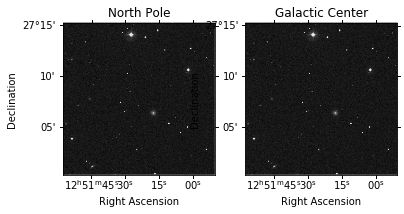

In [2]:
#Data
# North
north = fits.open("./Data/images/NorthPole.fits")
north_data = north[0].data
north_header = north[0].header
# Center
center = fits.open("./Data//images/GalCenter.fits")
center_data = north[0].data
center_header = north[0].header

#headers
north_wcs = WCS(north_header)
center_wcs = WCS(center_header)

#Plot Basics
fig = plt.figure()
ax1 = fig.add_subplot(121, projection=north_wcs)
ax2 = fig.add_subplot(122, projection=center_wcs)
ax = [ax1,ax2]

#Coordinates
ax[0].set_xlabel('Right Ascension')
ax[0].set_ylabel('Declination')
ax[1].set_xlabel('Right Ascension')
ax[1].set_ylabel('Declination')

#Labels
ax[0].set_title("North Pole")
ax[1].set_title("Galactic Center")

# Plots
ax[0].imshow(north_data, origin='lower', cmap=plt.cm.gray)
ax[1].imshow(center_data, origin='lower', cmap=plt.cm.gray);

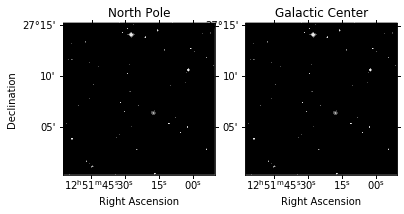

In [3]:
#Plot Basics
fig = plt.figure()
ax1 = fig.add_subplot(121, projection=north_wcs)
ax2 = fig.add_subplot(122, projection=center_wcs)
ax = [ax1,ax2]

#Coordinates
# North
ax[0].set_xlabel('Right Ascension')
ax[0].set_ylabel('Declination')
# Center
ax[1].set_xlabel('Right Ascension')
ax[1].set_ylabel('Declination')

#Labels
ax[0].set_title("North Pole")
ax[1].set_title("Galactic Center")

#Cutting Data
#  North
clip_north = stats.sigma_clip(north_data, sigma=7, maxiters=5)  
clipped_north = np.copy(clip_north)
clipped_north[~clip_north.mask] = clip_north.min()
#  Center
clip_center = stats.sigma_clip(center_data, sigma=7, maxiters=5)  
clipped_center = np.copy(clip_center)
clipped_center[~clip_center.mask] = clip_center.min()

# Plots
ax[0].imshow(clipped_north, origin='lower', cmap=plt.cm.gray)
ax[1].imshow(clipped_center, origin='lower', cmap=plt.cm.gray);

## Part 2:

- Pick a cool [Messier object](https://en.wikipedia.org/wiki/List_of_Messier_objects) with Declination  > 0.
- Or, any astromonical object with Dec > 0.

* Download a DSS-2-infrared, DSS-2-red, and DSS-2-blue FITS images for the object.

  * Use "Display as GIF file" to preview your image.
  * Adjust the "Image Size" to get the whole object.
  * If you get an "Internal Server Error" that means that filter is not available.

- Create a pseudocolor RGB image from:

  * red = DSS-2-infrared
  * green = DSS-2-red
  * blue = DSS-2-blue


- You will have to experiment with the `stretch` to get a good image
- The image should be 10in x 10in, with labels.

 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


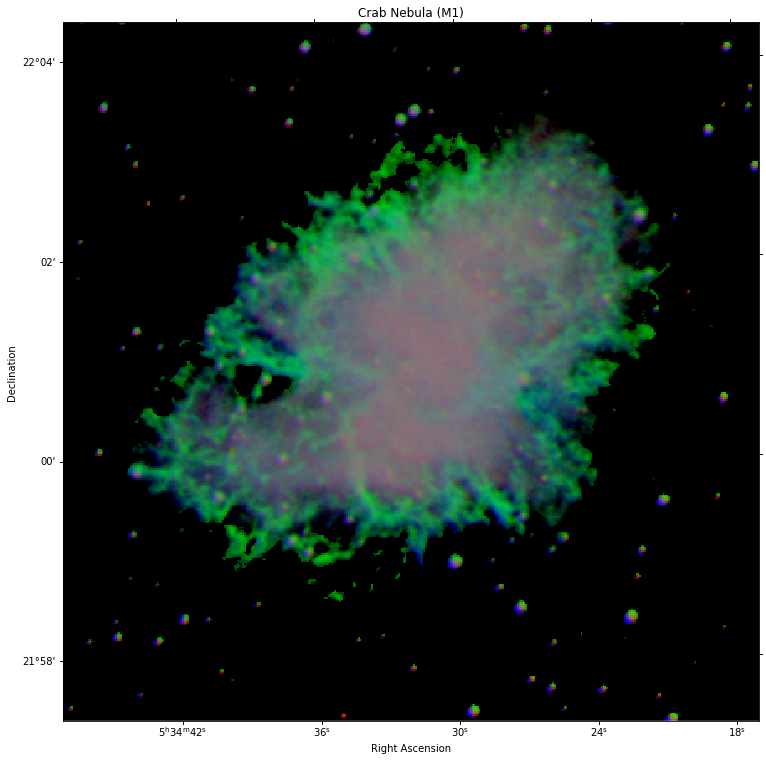

In [4]:
#Data
# Order
#  red
#  blue
#  infrared
m1 = [fits.open("./Data/images/m1_red.fits"),
      fits.open("./Data//images/m1_blue.fits"),
      fits.open("./Data//images/m1_infrared.fits")]
m1_data = [m1[0][0].data.astype(float),
           m1[1][0].data.astype(float),
           m1[2][0].data.astype(float)]

#Header
m1_header = m1[0][0].header
m1_wcs = WCS(m1_header)

#Cleaning up
clean_r =  m1_data[2] - m1_data[2].mean()
clean_g =  m1_data[0] - m1_data[0].mean()
clean_b =  m1_data[1] - m1_data[1].mean()

#Plot Basics
fig = plt.figure()
ax = fig.add_subplot(111, projection=m1_wcs)
fig.set_size_inches(10,10)
fig.tight_layout()

#Label
ax.set_title("Crab Nebula (M1)")

#Coordinates
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

#Graph
color_image = make_lupton_rgb(clean_r, clean_g, clean_b, stretch = 7000)
ax.imshow(color_image, origin='lower', cmap=plt.cm.gray);


### Due Fri Mar 1 - 5 pm
- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`